In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To preprocess the data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV

#for classification tasks
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier

#metrics
from sklearn.metrics import accuracy_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset = pd.read_csv("E:\\Code Alpha\\Machine Learning\\Heart Disease Prediction\\Dataset\\heart_disease_uci.csv")
dataset.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Dataset EDA

In [3]:
dataset.shape

(920, 16)

In [4]:
dataset.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# Data Visualization

Mean: 53.51086956521739
Median: 54.0
Mode: 54


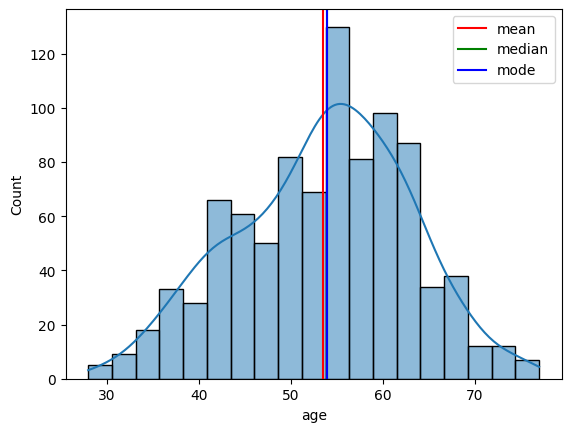

In [6]:
# plot the mean, median and mode of age column using sns
sns.histplot(dataset['age'], kde=True)
plt.axvline(dataset['age'].mean(), label = 'mean', color='red')
plt.axvline(dataset['age'].median(), label = 'median',color='green')
plt.axvline(dataset['age'].mode()[0], label = 'mode', color='blue')
plt.legend()

# print the value of mean, median and mode of age column
print('Mean:', dataset['age'].mean())
print('Median:', dataset['age'].median())
print('Mode:', dataset['age'].mode()[0])

<Axes: xlabel='age', ylabel='Count'>

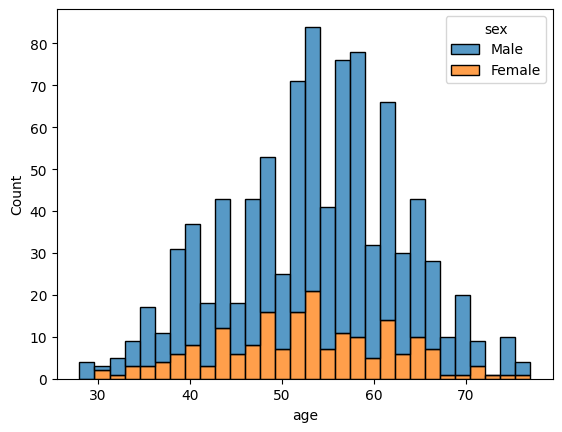

In [7]:
# plot the histogram of age column using plotly and coloring this by sex
sns.histplot(data=dataset, x='age', hue='sex', multiple='stack', bins=30)

In [8]:
sex_counts = dataset['sex'].value_counts()

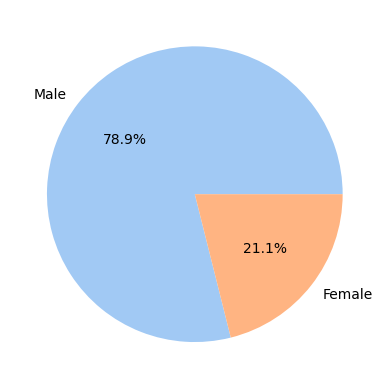

In [9]:
plt.pie(sex_counts, labels=sex_counts.index, colors=sns.color_palette("pastel"), autopct='%1.1f%%')
plt.show()

In [10]:
cm = pd.crosstab(dataset['cp'],dataset['num'],)
cm

num,0,1,2,3,4
cp,,,,,
asymptomatic,104,197,89,83,23
atypical angina,150,19,2,3,0
non-anginal,131,37,14,18,4
typical angina,26,12,4,3,1


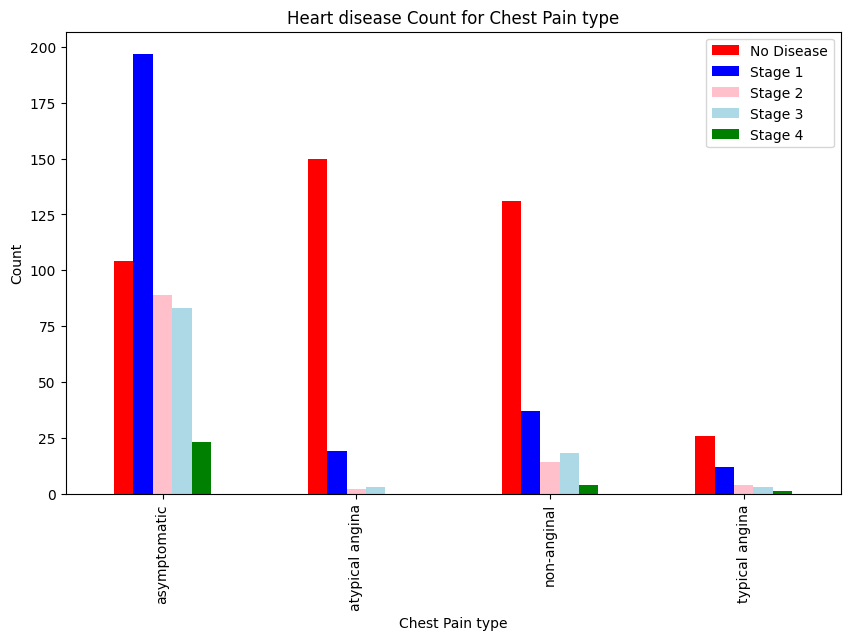

In [11]:
# Add Some Helpful info
pd.crosstab(dataset.cp,dataset.num).plot(kind="bar",figsize=(10,6), color = ['red','blue','pink','lightblue','green'])

plt.title('Heart disease Count for Chest Pain type')

plt.xlabel('Chest Pain type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
plt.show()

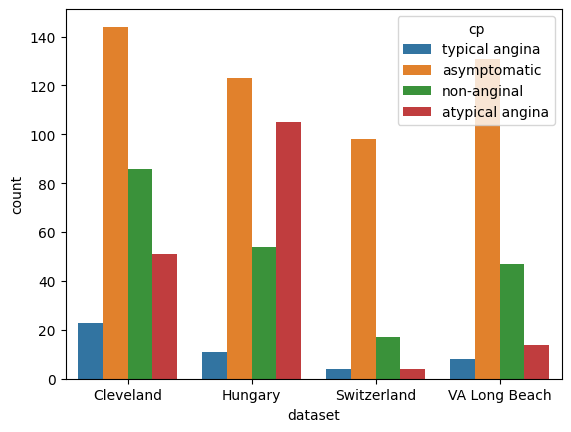

In [12]:
sns.countplot(dataset, x='dataset', hue='cp')
plt.show()

# Handling Missing Values

In [13]:
missing_values = dataset.isnull().sum()
print(100 * missing_values/920)

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


In [14]:
missing_data_cols = missing_values[missing_values > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [15]:
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

bool_cols = ['fbs', 'exang']

numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age', 'num']


In [16]:
# Encode categorical variables
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column].astype(str))
    label_encoders[column] = le

# Check for missing values
missing_columns = dataset.columns[dataset.isnull().any()]

# Apply Iterative Imputer
iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)
dataset[missing_columns] = iterative_imputer.fit_transform(dataset[missing_columns])

# Decode categorical variables back to original form if needed
for column, le in label_encoders.items():
    dataset[column] = le.inverse_transform(dataset[column])

In [17]:
dataset.to_csv('heart_disease_cleaned.csv', index=False)


# Dataset Preprocessing

In [18]:
dataset2 = dataset.copy()

In [19]:
# In some of the features, there is space will will create problem later on. 
# So we rename those attributes to handle problems in the future.

dataset2['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
dataset2['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)
dataset2['restecg'].replace({'normal': 'normal' , 'st-t abnormality': 'ST-T_wave_abnormality' , 'lv hypertrophy': 'left_ventricular_hypertrophy' }, inplace =True)

# Genrating New Dataset with Less Columns Which Are Necessary .
data_1 = dataset2[['age','sex','cp','dataset', 'trestbps', 'chol', 'fbs','restecg' , 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()

# Some Changes in Target Variable | Only Two Categories (0,1) . 0 for No-Disease , 1 for Disease
data_1['target'] = ((dataset2['num'] > 0)*1).copy()
# Encoding Sex 
data_1['sex'] = (dataset2['sex'] == 'Male')*1
# Encoding Fbs and exang
data_1['fbs'] = (dataset2['fbs'])*1
data_1['exang'] = (dataset2['exang'])*1
# Renaming COlumns Names.
data_1.columns = ['age', 'sex', 'chest_pain_type','country' ,'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar','Restecg',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']


## Label Encoding

In [20]:
# Preprocessing
label_encoders = {}
for col in data_1.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    data_1[col] = le.fit_transform(data_1[col])
    label_encoders[col] = le



## X, y dataset

In [21]:
X = data_1.drop('target', axis=1)  
y = data_1['target']

## Test, Train Split

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# XGBoost Model

In [23]:
# Define the XGBClassifier model
xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

    # Get the best model and parameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

    # Print the best hyperparameters
print('Best Hyperparameters:')
print(best_xgb_model)
print(best_params)

Best Hyperparameters:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)
{'colsample_bytree': 0.8, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [24]:
# Train the model on the full training set
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

## Model Prediction

In [25]:
# Evaluate the model on the test set
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy*100:.2f}')

Accuracy on Test Set: 83.33


In [26]:
# Making Predictions on New Data
new_data = X_test[6:15]  # Example with some test data
xgb_predictions = best_xgb_model.predict(new_data)

print("Acual Data:", y_test[6:15].values)
print("Predicted :", xgb_predictions)

Acual Data: [1 0 0 1 1 0 0 1 1]
Predicted : [1 0 0 1 0 0 0 1 0]
